<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 187.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 181.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 158.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 139.2 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [7]:
# データの基本情報を表示
print("データの基本情報:")
print(df.info())

# データの統計情報を表示
print("\nデータの統計情報:")
print(df.describe(include="all")) 

データの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

データの統計情報:
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75%     49078.000000                             NaN       

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [9]:
# 1. 各列の欠損値の数をカウント
missing_values_count = df.isnull().sum()

# 2. 各列の欠損率（全体の行数に対する割合）を計算
missing_values_percentage = (missing_values_count / len(df)) * 100

# 3. 結果をデータフレームにまとめる
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

# 4. 欠損値がある列のみ表示
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

# 結果の表示
print("欠損値のある列:")
print(missing_values_df)


欠損値のある列:
                     Missing Values  Percentage (%)
RemoteWork                    10631       16.246160
CodingActivities              10971       16.765744
EdLevel                        4653        7.110656
LearnCode                      4949        7.563000
LearnCodeOnline               16200       24.756636
...                             ...             ...
JobSatPoints_11               35992       55.002522
SurveyLength                   9255       14.143375
SurveyEase                     9199       14.057796
ConvertedCompYearly           42002       64.186928
JobSat                        36311       55.490013

[109 rows x 2 columns]


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



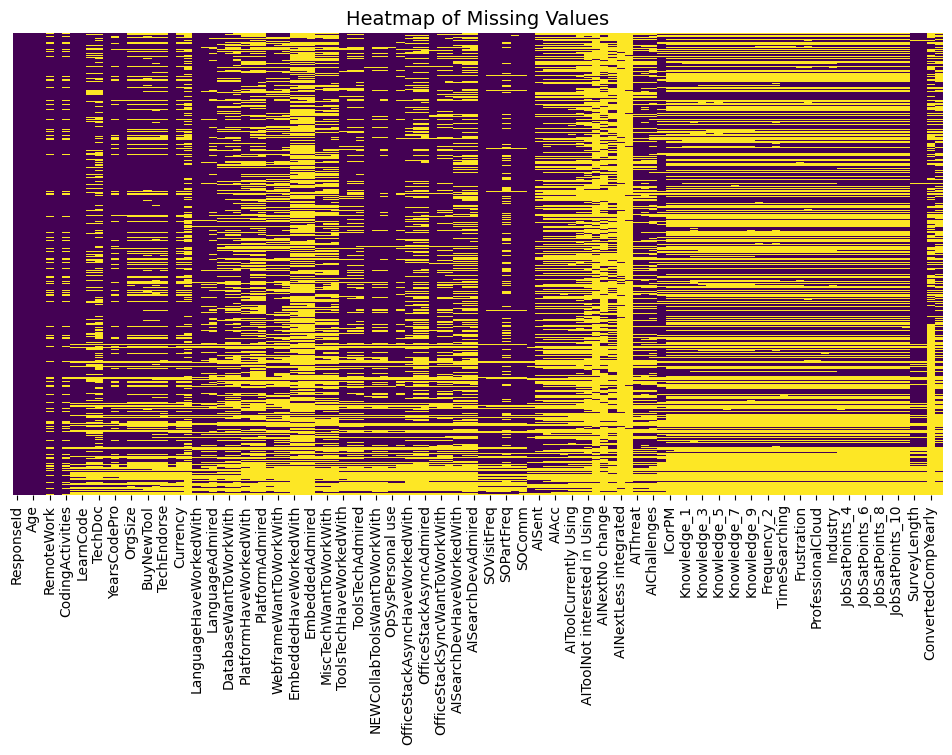

In [10]:
# グラフのサイズを設定
plt.figure(figsize=(12, 6))

# 欠損値のヒートマップを作成
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# タイトルを追加
plt.title("Heatmap of Missing Values", fontsize=14)

# グラフを表示
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [14]:
# Employment列の欠損値の数をカウント
missing_convertedcompyearly_count = df['ConvertedCompYearly'].isnull().sum()

# 結果を表示
print(f"ConvertedCompYearly 列の欠損行数: {missing_convertedcompyearly_count}")

ConvertedCompYearly 列の欠損行数: 42002


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [15]:
# ConvertedCompYearly 列の最頻値（mode）を取得
most_frequent_value = df['ConvertedCompYearly'].mode()[0]

# 結果を表示
print(f"ConvertedCompYearly の最頻値（最も多く出現する値）: {most_frequent_value}")

ConvertedCompYearly の最頻値（最も多く出現する値）: 64444.0


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [16]:
# 1. ConvertedCompYearly の最頻値（mode）を取得
most_frequent_value = df['ConvertedCompYearly'].mode()[0]

# 2. 欠損値を最頻値で補完
df['ConvertedCompYearly'].fillna(most_frequent_value, inplace=True)

# 3. 欠損値がなくなったことを確認
missing_after_imputation = df['ConvertedCompYearly'].isnull().sum()

# 結果の表示
print(f"ConvertedCompYearly の欠損値補完後の欠損数: {missing_after_imputation}")


ConvertedCompYearly の欠損値補完後の欠損数: 0


/tmp/ipykernel_299/362140026.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(most_frequent_value, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


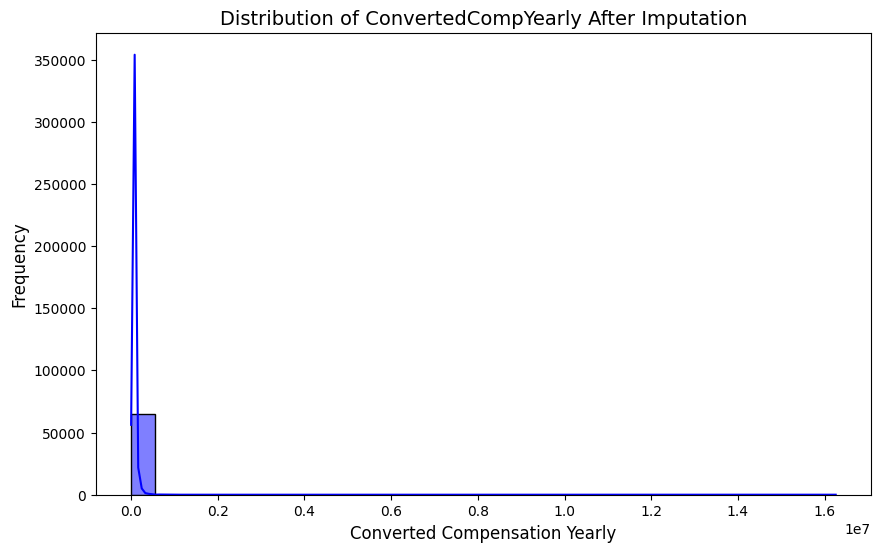

In [18]:
# ヒストグラムを作成して、補完後の ConvertedCompYearly の分布を可視化
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, color="blue")

# タイトルとラベルを設定
plt.title("Distribution of ConvertedCompYearly After Imputation", fontsize=14)
plt.xlabel("Converted Compensation Yearly", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# グラフを表示
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
